# Makine Öğrenmesi
* Makine Öğrenmesi, matematiksel ve istatistiksel işlemler ile veriler üzerinden çıkarımlar yaparak tahminlerde bulunan sistemlerin bilgisayarlar ile modellemesidir.

### Dört tür makine öğrenme algoritması vardır: denetlenen, yarı denetlenen, denetlenmeyen ve güçlendirme.
1. Denetimli Makine Öğrenmesi.
2. Yarı Denetimli Makine Öğrenmesi.
3. Denetimsiz Makine Öğrenmesi.
4. Takviyeli Makine Öğrenmes

* Makine öğrenmesi hakkında daha fazla bilgi için:
http://www.prowmes.com/blog/makine-ogrenmesi/

* Bu dersimizde denetimli makine öğrenmesinin alt başlıklarından regresyon modellerinden olan lineer regresyon modelini ele alacağız.

# Lineer Regresyon

* Doğrusal regresyon, iki veya daha fazla değişken arasındaki ilişkiyi tanımlamak için kullanılan doğrusal bir modelin yaklaşımıdır.
* Basit doğrusal regresyonda iki değişken vardır: bağımlı değişken ve bağımsız değişken.
* Değişkeni tahmin etmek için bir bağımsız değişken kullanıldığında gerçekleşir.
* Bağımlı değişken(Y): Makine öğrenmesi probleminde tahmin etmek için hedeflediğimiz ana değişkendir. (Araç fiyatı ve benzeri)
* Bağımsız değişken(X): Bağımlı değişkeni tahmin etmemize yardımcı olan değişkendir. (Vites türü, marka ve benzeri)

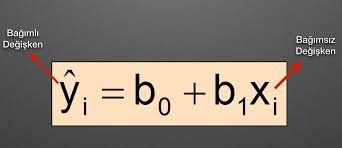

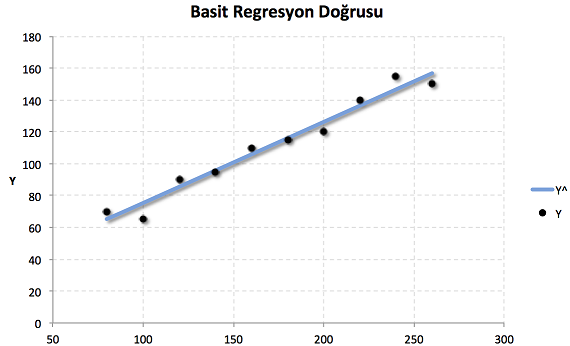

* β0:Doğrunun y-eksenini kestiği yer ve regresyon sabitidir.

* β1:Doğrunun eğimi veya regresyon katsayısıdır

## Veri Setimizde Bu Öğrendiklerimizi Pekiştirelim

* Veri setimizde evin birim alan fiyatını etkileyen özelliklere yer verilmiştir.

In [ ]:
import pandas as pd
df = pd.read_excel("../input/real-estate-valuation-dataset/Real estate valuation data set.xlsx")

In [ ]:
df.head()

* Veri setimizdeki sütunları türkçeye çevirelim.

In [ ]:
df=df.rename(columns={"X1 transaction date":"İşlem Tarihi",
                  "X2 house age":"Ev Yaşı",
                  "X3 distance to the nearest MRT station":"Metroya Olan Uzaklık",
                  "X4 number of convenience stores":"Civardaki Market Sayısı",
                  "X5 latitude":"Enlem",
                  "X6 longitude":"Boylam",
                  "Y house price of unit area":"Birim Alan Fiyatı"})
df.head()

* Veri setimizde bağımsız değişkenler Ev Yaşı,Metroya Olan Uzaklık ve Civardaki Market Sayısı sütunlarıdır.
* Bağımlı değişken ise Birim Alan Fiyatı sütunudur.

* Lineer regresyon için bir tane bağımsız değişken seçelim.
* Evin metroya olan uzaklık mesafesi birim alan fiyatını nasıl etkilediğini tahmin edelim.
* Bunun için bağımsız değişken(X=Metroya Olan Uzaklık) ve bağmlı değişkeni(Y=Birim Alan Fiyatı) seçelim

In [ ]:
X = df[["Metroya Olan Uzaklık"]]#bağımsız değişken
y=df[["Birim Alan Fiyatı"]]#bağımlı değişken

In [ ]:
X.head()

In [ ]:
y.head()

* Tahmin edebilmek için model kurmamız gerekir.
* Bunun için sklearn kütüphanesini kullanacağız.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression().fit(X,y)#modeli kurmak

* Formülü tekrar hatırlayalım.(y=b0+b1*x)
* Sklearn kütüphanesinde b0 ve b1 yerine yazacağımız parametler ise intercept_ ve coef_'dir.
* Bu değerleri nasıl öğrenebileceğimize bakalım.

In [ ]:
model.intercept_#(b0)

In [ ]:
model.coef_#(b1)

* Tahmin işlemi için gerekli katsayıları elde ettik.
* Artık değerleri yerine koyarak tahmin yapabilriz.

In [ ]:
45.85142706+(-0.00726205)*X[0:5]

* Tahmin işlemini kendimiz formülü yazarak yaptık.
* Sklearn kütüphanesinden parametre kullanarak yapabiliriz.

In [ ]:
model.predict(X)[0:5]

* Başka bir örnek olarak metroya olan uzaklık mesafesi 5,50 ve 500 birim olduğunda birim alan fiyatının ne kadar olduğunu tahmin edelim.

In [ ]:
model.predict([[5],[50],[500]])

* Buraya kadar yaptığımız işlemleri grafik olarak inceleyelim.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["Metroya Olan Uzaklık"], df["Birim Alan Fiyatı"], ci=None, scatter_kws={'color':'r', 's':9})
plt.ylim(bottom=0);

## Hatalar
1. MSE: Hata Kareler Ortalaması

2. RMSE: Hata Kareler Ortalamasının Karekökü

* Tahminlerimizin gerçek değerlere ne kadar yakın olduğu anlamak için hata miktarımızı bulmamız gerekir.

### MSE: Hata Kareler Ortalaması
* Ortalama hata bir makine öğrenmesi modelinin öngördüğü tahmin değerleri ile gerçek değerlerin arasındaki ortalama hatadır. Bu bağlamdaki hata bir ölçümdeki belirsizlik veya tahmini değer ile gerçek değer arasındaki farktır.
**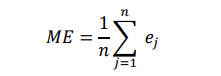**

### RMSE: Hata Kareler Ortalamasının Karekökü
* Bir makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir.
* RMSE tahmin hatalarının (kalıntıların) standart sapmasıdır.
**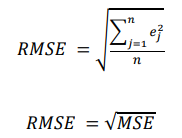**

* Hata miktarını bulmak için gerçek ve tahmin edilen y değerlerini karşılaştıralım.

In [ ]:
gercek_y = y[0:10]
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])#numpy array'inden dataframe'ye çevirelim 

In [ ]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)#dataframe'leri birleştirme
hatalar.columns = ["gercek_y","tahmin_edilen_y"]#Sütunlara isim verme
hatalar

* Gerçek y değerlerini,tahmin edilen y değerlerini,hataları ve hataların karelerini bir dataframe olarak gösterelim.

In [ ]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]
hatalar["hata_kareler"] = hatalar["hata"]**2
hatalar

### MSE: Hata Kareler Ortalamasını Hesaplama
* Hem numpy kütüphanesi ile hemde sklearn kütüphanesi hata değerlerini hesaplayabiliriz.

In [ ]:
import numpy as np
np.mean(hatalar["hata_kareler"])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(gercek_y,tahmin_edilen_y)
MSE

### RMSE: Hata Kareler Ortalamasının Karekökünü Hesaplama

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

# Kaynaklar
* https://medium.com/batech/doğrusal-regresyon-algoritmasının-mantığı-ve-uygulanması-e65a86f806fd#:~:text=Doğrusal%20regresyon%2C%20iki%20veya%20daha,bağımlı%20değişken%20ve%20bağımsız%20değişken.&text=değişkeni%20tahmin%20etmek%20için%20bir%20bağımsız%20değişken%20kullanıldığında%20gerçekleşir.
* https://www.veribilimiokulu.com/basit-dogrusal-regresyon/
* https://veribilimcisi.com/2017/07/14/mse-rmse-mae-mape-metrikleri-nedir/
* http://www.prowmes.com/blog/makine-ogrenmesi/